In [3]:
pip install -U pgmpy

  Using cached pgmpy-1.0.0-py3-none-any.whl.metadata (9.4 kB)
Using cached pgmpy-1.0.0-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pgmpy
    Found existing installation: pgmpy 0.1.19
    Uninstalling pgmpy-0.1.19:
      Successfully uninstalled pgmpy-0.1.19
Note: you may need to restart the kernel to use updated packages.


In [4]:
#-----------------------------------------------
# Bayesian Network for Heart Disease Diagnosis
# Compatible with new pgmpy (DiscreteBayesianNetwork)
#-----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Load dataset
df = pd.read_csv("3heart.csv")

# Select relevant columns
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'exang', 'target']]

# Discretize continuous columns into categories
df['age'] = pd.cut(df['age'], bins=3, labels=['young', 'mid', 'old'])
df['trestbps'] = pd.cut(df['trestbps'], bins=3, labels=['lowBP', 'medBP', 'highBP'])
df['chol'] = pd.cut(df['chol'], bins=3, labels=['lowChol', 'medChol', 'highChol'])

# Convert all to string for discrete processing
for col in df.columns:
    df[col] = df[col].astype(str)

#-----------------------------------------------
# Define the Bayesian Network structure
#-----------------------------------------------
model = DiscreteBayesianNetwork([
    ('age', 'target'),
    ('sex', 'target'),
    ('cp', 'target'),
    ('exang', 'target'),
    ('target', 'restecg'),
    ('target', 'chol')
])

#-----------------------------------------------
# Train (fit) the model
#-----------------------------------------------
print("\nLearning Conditional Probability Distributions (CPDs)...")
model.fit(df, estimator=MaximumLikelihoodEstimator)
print(" Model successfully trained.")

#-----------------------------------------------
# Inference
#-----------------------------------------------
HeartDisease_infer = VariableElimination(model)

print("\n1️ Probability of Heart Disease given exang = 1")
q1 = HeartDisease_infer.query(variables=['target'], evidence={'exang': '1'})
print(q1)

print("\n2️ Probability of Heart Disease given cp = 2")
q2 = HeartDisease_infer.query(variables=['target'], evidence={'cp': '2'})
print(q2)

#-----------------------------------------------
# Display CPDs
#-----------------------------------------------
print("\n Conditional Probability Distributions (CPDs):\n")
for cpd in model.get_cpds():
    print(cpd)


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'age': 'C', 'sex': 'C', 'cp': 'C', 'trestbps': 'C', 'chol': 'C', 'restecg': 'C', 'exang': 'C', 'target': 'C'}



Learning Conditional Probability Distributions (CPDs)...
 Model successfully trained.

1️ Probability of Heart Disease given exang = 1
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5653 |
+-----------+---------------+
| target(1) |        0.4347 |
+-----------+---------------+

2️ Probability of Heart Disease given cp = 2
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2740 |
+-----------+---------------+
| target(1) |        0.7260 |
+-----------+---------------+

 Conditional Probability Distributions (CPDs):

+------------+----------+
| age(mid)   | 0.557073 |
+------------+----------+
| age(old)   | 0.235122 |
+------------+----------+
| age(young) | 0.207805 |
+------------+----------+
+-----------+--------------------+-----+------------+---------------------+
| age       | age(mid)           | ... | age(young) | age(young)          |
+-----------+--

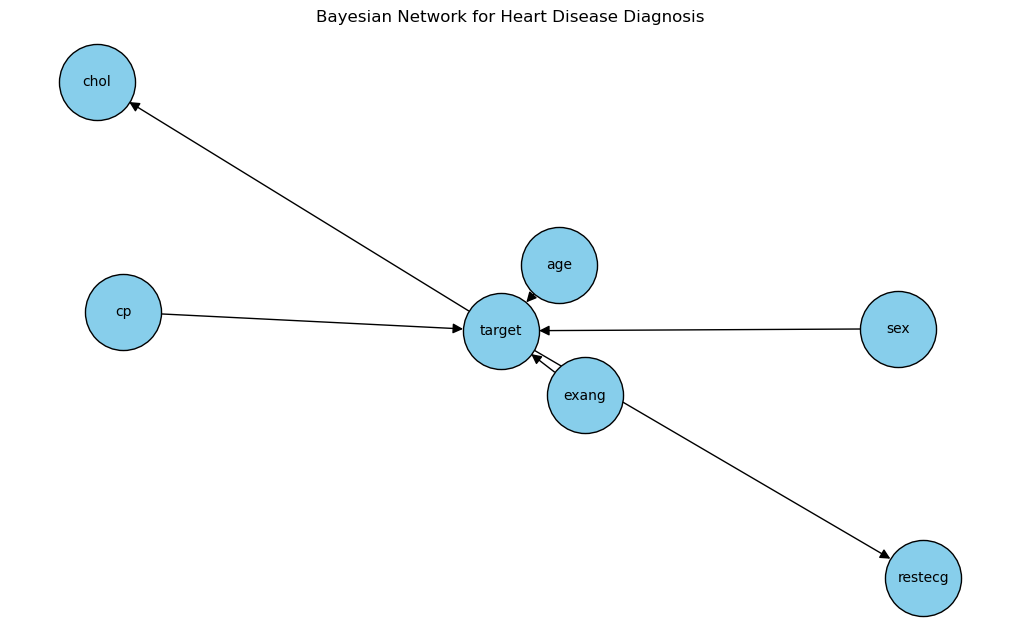

In [3]:
#-----------------------------------------------
# Visualization of Bayesian Network
#-----------------------------------------------

# Import NetworkX and Matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Convert pgmpy model to a NetworkX DiGraph
# pgmpy models (DiscreteBayesianNetwork or BayesianModel) are built on top of NetworkX,
# so we can directly access the underlying graph using `model.edges()`
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # layout for consistent positioning
nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    node_color='skyblue',
    font_size=10,
    font_color='black',
    arrowsize=15,
    edgecolors='black'
)
plt.title("Bayesian Network for Heart Disease Diagnosis")
plt.show()
